In [2]:
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#imports for LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RepeatVector, TimeDistributed

In [3]:
sub1_train = scipy.io.loadmat('sub1_comp.mat')
sub1_test = scipy.io.loadmat('sub1_testlabels.mat')
sub2_train = scipy.io.loadmat('sub2_comp.mat')
sub2_test = scipy.io.loadmat('sub2_testlabels.mat')
sub3_train = scipy.io.loadmat('sub3_comp.mat')
sub3_test = scipy.io.loadmat('sub3_testlabels.mat')

In [4]:
sub1_x_train=pd.DataFrame(sub1_train['train_data'])
sub1_y_train=pd.DataFrame(sub1_train['train_dg'])
sub1_x_test=pd.DataFrame(sub1_train['test_data'])
sub1_y_test=pd.DataFrame(sub1_test['test_dg'])

sub2_x_train=pd.DataFrame(sub2_train['train_data'])
sub2_y_train=pd.DataFrame(sub2_train['train_dg'])
sub2_x_test=pd.DataFrame(sub2_train['test_data'])
sub1_y_test=pd.DataFrame(sub1_test['test_dg'])

sub3_x_train=pd.DataFrame(sub3_train['train_data'])
sub3_y_train=pd.DataFrame(sub3_train['train_dg'])
sub3_x_test=pd.DataFrame(sub3_train['test_data'])
sub3_y_test=pd.DataFrame(sub3_test['test_dg'])

In [6]:
sub1_x_train

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,193,-491,-4293,2659,918,3700,-1166,111,-376,245,...,-2587,1310,-4677,38,-4787,-2258,-1782,1827,3096,2395
1,96,-451,-4419,2682,614,3581,-864,284,-344,387,...,-2805,1295,-4681,-34,-4696,-2090,-1746,1794,3120,2497
2,329,-272,-4380,2862,513,3540,-523,501,-148,622,...,-2871,1357,-4537,40,-4357,-1791,-1578,1668,3236,2569
3,713,-3,-4141,3033,830,3436,-210,609,1,793,...,-2930,1424,-4354,171,-3888,-1473,-1415,1373,3344,2546
4,968,207,-3748,3120,1249,3235,-7,601,53,888,...,-3037,1377,-4171,307,-3445,-1220,-1345,975,3383,2425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,778,-452,1137,-353,-1442,2834,-1259,-2186,631,404,...,2536,1125,330,1070,1540,765,-436,3531,3068,670
399996,1111,-390,1325,-137,-861,2809,-863,-1822,713,534,...,2672,1326,365,1340,1741,1157,-186,3680,3161,1347
399997,1047,-588,1257,-238,-599,2679,-793,-1638,464,344,...,2517,1292,133,1308,1669,1255,-261,3559,2951,1856
399998,841,-834,962,-433,-681,2650,-924,-1555,134,-22,...,2273,1093,-172,1103,1488,1202,-458,3342,2703,2135


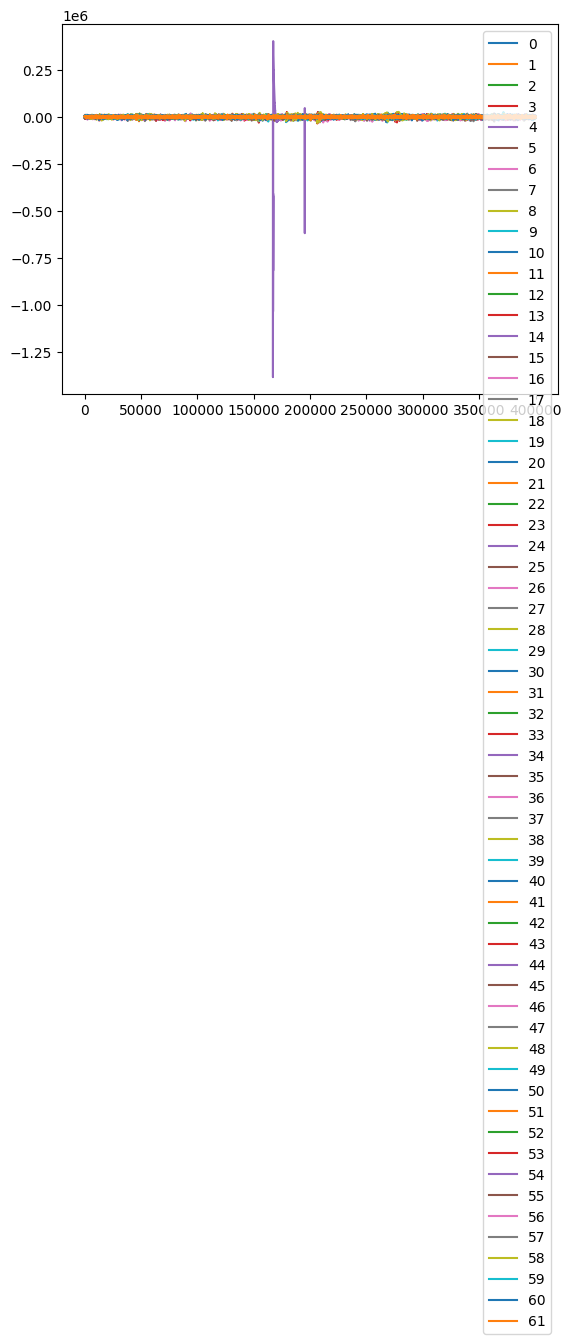

In [5]:
sub1_x_train.plot()
figsize=(40,10)

In [9]:
sub1_x_train_Q1 = sub1_x_train.quantile(0.25)
sub1_x_train_Q3 = sub1_x_train.quantile(0.75)
IQR = sub1_x_train_Q3 - sub1_x_train_Q1
sub1_x_train_final = sub1_x_train[~((sub1_x_train < (sub1_x_train_Q1 - 1.5 * IQR)) |(sub1_x_train > (sub1_x_train_Q3 + 1.5 * IQR))).any(axis=1)]

In [10]:
#instead of removing the outliers by IQR cap them to the IQR
sub1_x_train_final = sub1_x_train.clip(sub1_x_train_Q1 - 1.5 * IQR, sub1_x_train_Q3 + 1.5 * IQR, axis = 1)

sub1_x_train_final

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,193,-491.0,-4293.0,2659,918.0,3700,-1166.0,111,-376,245,...,-2587,1310,-4677.0,38,-4787,-2258,-1782,1827,3096.0,2395
1,96,-451.0,-4419.0,2682,614.0,3581,-864.0,284,-344,387,...,-2805,1295,-4681.0,-34,-4696,-2090,-1746,1794,3120.0,2497
2,329,-272.0,-4380.0,2862,513.0,3540,-523.0,501,-148,622,...,-2871,1357,-4537.0,40,-4357,-1791,-1578,1668,3236.0,2569
3,713,-3.0,-4141.0,3033,830.0,3436,-210.0,609,1,793,...,-2930,1424,-4354.0,171,-3888,-1473,-1415,1373,3344.0,2546
4,968,207.0,-3748.0,3120,1249.0,3235,-7.0,601,53,888,...,-3037,1377,-4171.0,307,-3445,-1220,-1345,975,3383.0,2425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,778,-452.0,1137.0,-353,-1442.0,2834,-1259.0,-2186,631,404,...,2536,1125,330.0,1070,1540,765,-436,3531,3068.0,670
399996,1111,-390.0,1325.0,-137,-861.0,2809,-863.0,-1822,713,534,...,2672,1326,365.0,1340,1741,1157,-186,3680,3161.0,1347
399997,1047,-588.0,1257.0,-238,-599.0,2679,-793.0,-1638,464,344,...,2517,1292,133.0,1308,1669,1255,-261,3559,2951.0,1856
399998,841,-834.0,962.0,-433,-681.0,2650,-924.0,-1555,134,-22,...,2273,1093,-172.0,1103,1488,1202,-458,3342,2703.0,2135


<Axes: >

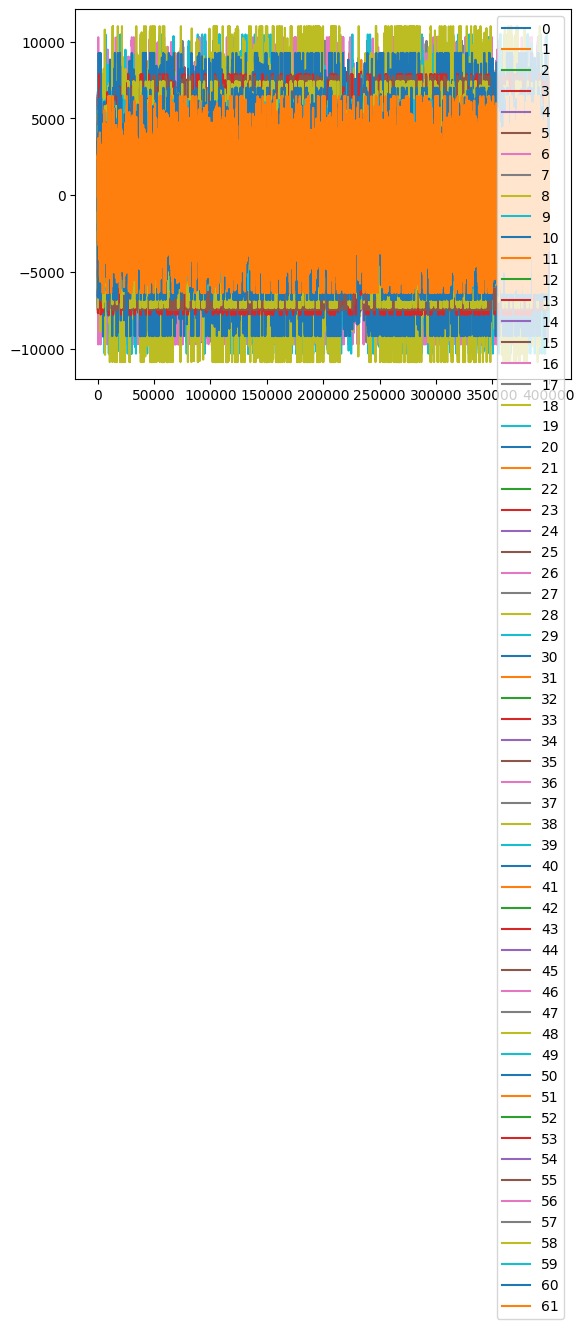

In [12]:
sub1_x_train_final.plot()

In [11]:
sub1_x_train_final.describe()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,...,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,-0.213973,14.804181,-1.998130,19.655110,-2.712344,8.521762,37.580978,-1.480905,12.101900,19.610350,...,3.897280,10.938503,3.181999,46.423727,0.742542,-1.246240,18.973715,8.667568,35.431524,15.323895
std,2127.814996,3611.105667,2115.222326,3186.322475,2654.284732,2534.728758,2932.774167,1922.568845,3384.249762,2991.492985,...,2368.816021,3049.809814,2252.980117,3012.878325,2017.769836,2207.680412,2876.475245,2328.250396,2647.299394,2424.614415
min,-5697.000000,-9135.500000,-5671.500000,-7929.000000,-6993.500000,-6682.000000,-7467.500000,-5193.000000,-8630.000000,-7754.000000,...,-6372.000000,-7774.000000,-5798.500000,-7478.000000,-5444.000000,-5976.000000,-7335.000000,-6169.000000,-6819.500000,-6376.000000
25%,-1437.000000,-2237.000000,-1416.000000,-1938.000000,-1772.000000,-1648.000000,-1778.000000,-1296.000000,-2129.000000,-1883.000000,...,-1581.000000,-1903.000000,-1426.000000,-1757.000000,-1370.000000,-1500.000000,-1803.000000,-1528.000000,-1637.000000,-1564.000000
50%,-15.000000,65.000000,7.000000,131.000000,-54.000000,28.000000,194.000000,0.000000,80.000000,94.000000,...,42.000000,70.000000,54.000000,220.000000,-29.000000,0.000000,56.000000,25.000000,125.000000,52.000000
75%,1403.000000,2362.000000,1421.000000,2056.000000,1709.000000,1708.000000,2015.000000,1302.000000,2205.000000,2031.000000,...,1613.000000,2011.000000,1489.000000,2057.000000,1346.000000,1484.000000,1885.000000,1566.000000,1818.000000,1644.000000
max,5663.000000,9260.500000,5676.500000,8047.000000,6930.500000,6742.000000,7704.500000,5199.000000,8706.000000,7902.000000,...,6404.000000,7882.000000,5861.500000,7778.000000,5420.000000,5960.000000,7417.000000,6207.000000,7000.500000,6456.000000


In [12]:
#do the same with the test data
sub1_x_test_Q1 = sub1_x_test.quantile(0.25)
sub1_x_test_Q3 = sub1_x_test.quantile(0.75)
IQR = sub1_x_test_Q3 - sub1_x_test_Q1
sub1_x_test_final = sub1_x_test[~((sub1_x_test < (sub1_x_test_Q1 - 1.5 * IQR)) |(sub1_x_test > (sub1_x_test_Q3 + 1.5 * IQR))).any(axis=1)]
#clip outliers
sub1_x_test_final = sub1_x_test.clip(sub1_x_test_Q1 - 1.5 * IQR, sub1_x_test_Q3 + 1.5 * IQR, axis = 1)
sub1_x_test_final

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,389,-1214.0,112,-782.0,-1320.0,2691,-1287.0,-1546.0,-621,-787,...,1772,431,-743,747,1031.0,749,-1032.0,2829,2215,1900.0
1,-99,-1495.0,-258,-1073.0,-1828.0,2397,-1581.0,-1814.0,-1034,-1078,...,1399,7,-1100,529,557.0,231,-1442.0,2482,1834,1207.0
2,-501,-1661.0,-265,-1269.0,-2097.0,2158,-1775.0,-2051.0,-1183,-1208,...,1167,-188,-1373,414,151.0,-133,-1696.0,2331,1638,347.0
3,-632,-1612.0,151,-1224.0,-1935.0,2190,-1670.0,-2044.0,-1041,-1192,...,1171,-66,-1481,467,-15.0,-203,-1741.0,2439,1688,-453.0
4,-713,-1527.0,678,-1174.0,-1643.0,2324,-1446.0,-1919.0,-857,-1204,...,1191,86,-1557,559,-100.0,-245,-1783.0,2598,1739,-1233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2090,4354.0,-432,5200.0,812.0,1503,4769.0,1694.0,-3683,-2475,...,-1427,-378,1802,2015,1313.0,-809,2652.0,994,-674,-1571.0
199996,1906,4203.0,-673,4827.0,363.0,1304,4424.0,1588.0,-3930,-2846,...,-1561,-622,1557,1769,1190.0,-1349,2409.0,548,-948,-1864.0
199997,1979,4323.0,-744,4727.0,489.0,1430,4330.0,1781.0,-3955,-2950,...,-1458,-663,1566,1721,1255.0,-1570,2412.0,305,-1002,-1931.0
199998,2259,4593.0,-660,4814.0,1033.0,1773,4475.0,2121.0,-3775,-2843,...,-1182,-536,1754,1777,1417.0,-1485,2558.0,256,-828,-1891.0


In [10]:
sub1_x_test.plot()

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x00000292EB2E8CA0> (for post_execute):


KeyboardInterrupt: 

<Axes: >

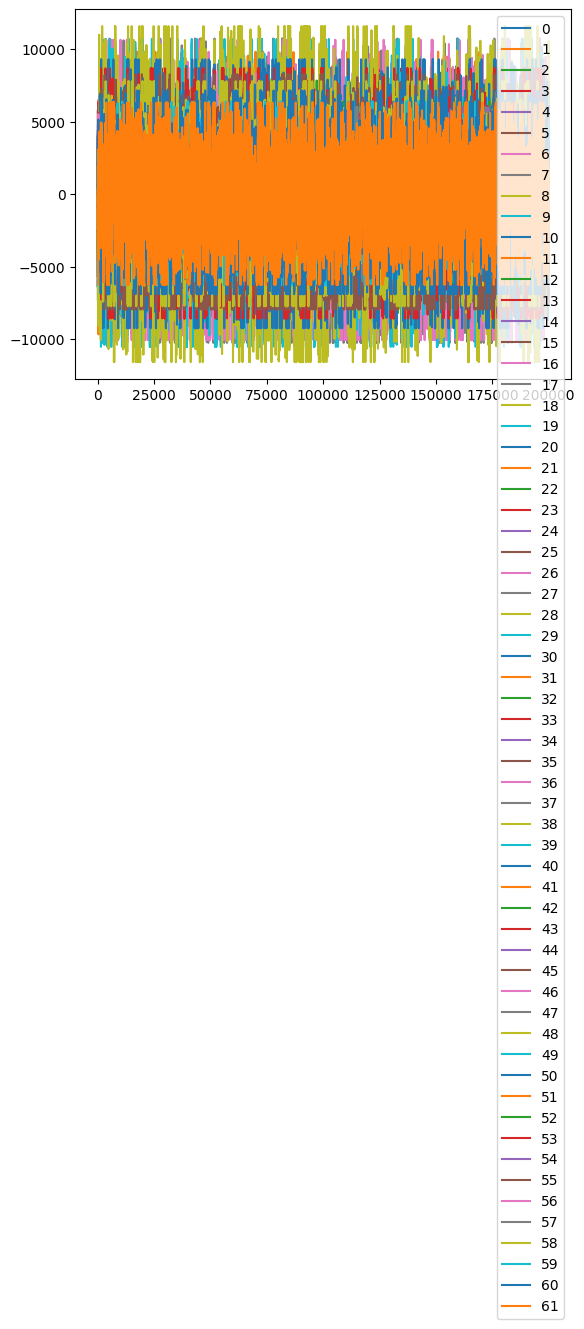

In [31]:
sub1_x_test_final.plot()

In [13]:
sub1_y_test

,0,1,2,3,4
0,-0.704228,-0.418322,-0.253147,-0.241320,-0.059460
1,-0.704316,-0.418322,-0.253147,-0.241299,-0.059460
2,-0.704403,-0.418322,-0.253147,-0.241279,-0.059460
3,-0.704489,-0.418322,-0.253147,-0.241258,-0.059460
4,-0.704575,-0.418322,-0.253147,-0.241237,-0.059460
...,...,...,...,...,...
199995,3.012252,-0.350811,-0.175468,-0.245033,-0.058219
199996,2.966711,-0.345495,-0.172822,-0.241422,-0.057356
199997,2.921104,-0.340174,-0.170173,-0.237805,-0.056493
199998,2.875451,-0.334850,-0.167523,-0.234182,-0.055628


In [14]:
#train a linear regression model on x_train_final and y_train and then find correlation with final y_test
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(sub1_x_train_final, sub1_y_train)
y_pred = regressor.predict(sub1_x_test_final)
y_pred_df=pd.DataFrame(y_pred)
y_pred_df 

,0,1,2,3,4
0,0.094362,-0.112918,-0.081861,-0.130914,-0.198452
1,0.077345,-0.125801,-0.107696,-0.134036,-0.189022
2,0.062207,-0.139172,-0.130254,-0.141030,-0.170547
3,0.063043,-0.146825,-0.142214,-0.142571,-0.144801
4,0.074622,-0.150739,-0.151775,-0.137427,-0.122952
...,...,...,...,...,...
199995,-0.153203,-0.193798,-0.343958,-0.323971,-0.021867
199996,-0.127410,-0.203627,-0.354454,-0.312981,-0.023534
199997,-0.101130,-0.204409,-0.357525,-0.300612,-0.025758
199998,-0.074116,-0.193200,-0.346206,-0.285651,-0.022746


In [15]:
#find correlation between y_pred and y_test
from scipy.stats import pearsonr
array1 = np.array(sub1_y_test)
array2 = np.array(y_pred_df)
corr, _ = pearsonr(array1.flatten(), array2.flatten())
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.038
